In [0]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Litre Yagis')

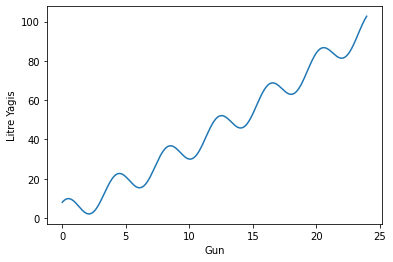

In [0]:
t = np.arange(0,24,1/30.0)

y = 2 + 3*t + 0.04*t**2 + 3*np.sin(t/4.0*(2*np.pi)) + 6*np.cos(t/4.0*(2*np.pi))

plt.plot(t,y)

plt.xlabel('Gun')
plt.ylabel('Litre Yagis')

$$
y = 3 + 3t + 0.04t^2 + 0.3sin(2 \pi t/4) + 0.6cos(2\pi t/4)
$$

y: sezonluk yagis miktari

t: ay, fractional month. 

$$
y = f(t)
$$

f: yagis miktarinin aya gore nasil degistiginin modeli.

## olcumlerimiz gun, o gune kadarki toplam yagis miktari
$$
y = \begin{bmatrix}
y_1\\
y_2\\
y_3\\
\vdots\\
y_N
\end{bmatrix}
$$

$$
t = \begin{bmatrix}
t_1\\
\vdots\\
t_N
\end{bmatrix}
$$

$$
(y_i,t_i) , i \in {1,2,3,4,...,N}
$$


## Hipotez, havuzdaki toplam su miktari asagidaki gibi modellenebilir.
$$
y = f(t)
$$

$$
f(t) = \beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 sin(2\pi \frac{t}{4}) + \beta_4 cos(2\pi \frac{t}{4})
$$

## Bilinmeyenler, asagidaki gibi tanimlanabilir.
1- $\beta_0$ : Olcume baslandiginda toplam ne kadar su vardi.

2- $\beta_1$ : gunluk artis miktari, lineer

3- $\beta_2$: karesel artis miktari, karesel

4- $\beta_3, \beta4$: sezonsan degisimler. $sin(2\pi f t + \omega)$




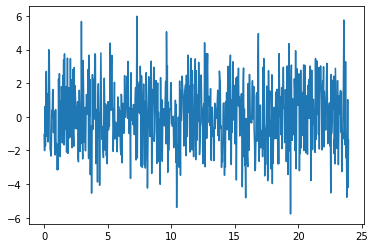

In [0]:
noise = np.random.randn(len(t))*2
plt.plot(t,noise)



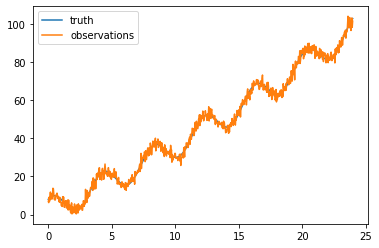

In [0]:
y_obs = y + noise

plt.plot(t,y, label='truth')
plt.plot(t,y_obs,label='observations')
plt.legend()


$$
y_i = f(t_i) +e_i = \beta_0 + \beta_1 t_i + \beta_2 t_i^2 ... +e_i
$$

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{e}
$$

$$
\boldsymbol{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1\\
\beta_2 \\
\beta_3 \\
\beta_4
\end{bmatrix}
$$


$$
\boldsymbol{X} = \begin{bmatrix}
1 & t_1 & t_1^2 & sin(t_1/4 2 \pi) & cos(t_1/4 2 \pi)\\
1 & t_2 & t_2^2 & sin(t_2/4 2 \pi) & cos(t_2/4 2 \pi)\\
\ldots\\
1 & t_N & t_N^2 & sin(t_N/4 2 \pi) & cos(t_N/4 2 \pi)\\
\end{bmatrix}
$$

## 5 olcum olsaydi ve olcum hatasi olmasaydi
$$
\boldsymbol{\beta} = \boldsymbol{X}^{-1}\boldsymbol{y}
$$


## Least squares cozumu

$$
e = y - X\beta
$$

$$
e = \begin{bmatrix}
e_1\\
e_2\\
\vdots\\
e_N
\end{bmatrix}
$$


$$
RSS(\beta) = e^Te = (y-X\beta)^T(y-X\beta)
$$


## minimum yapan yer
$$
\frac{\partial{RSS}}{\beta} = 0 , \text{cozum kumesi LSQ cozumu}
$$

$$
\frac{\partial{RSS}}{\beta} = \frac{\partial{\left( y^Ty -y^TX\beta -(X\beta)^Ty +(X\beta)^TX\beta \right)}}{\beta} = 0
$$

$$
= 0 -2X^Ty + 2(X^TX)\beta = 0
$$

$$
X^TX\beta = X^Ty, A\beta = b
$$

$$
\beta = (X^TX)^{-1}X^Ty = A^{-1}b
$$



## Diklik kurali

$$
X^TX\beta = X^Ty
$$

$$
 0 = X^Ty -X^TX\beta
$$

$$
 0 = X^T(y -X\beta) = X^Te
$$




In [0]:
X = np.vstack( 
    (np.ones(len(t)),
     t,
     t**2,
     np.sin(2*np.pi*t/4.0),
     np.cos(2*np.pi*t/4.0),
     )
).T


print (X)



A = np.dot(X.T, X)
b = np.dot(X.T, y_obs)

A_inv = np.linalg.inv(A)

beta = np.dot(A_inv, b)

print (beta)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [ 1.00000000e+00  3.33333333e-02  1.11111111e-03  5.23359562e-02
   9.98629535e-01]
 [ 1.00000000e+00  6.66666667e-02  4.44444444e-03  1.04528463e-01
   9.94521895e-01]
 ...
 [ 1.00000000e+00  2.39000000e+01  5.71210000e+02 -1.56434465e-01
   9.87688341e-01]
 [ 1.00000000e+00  2.39333333e+01  5.72804444e+02 -1.04528463e-01
   9.94521895e-01]
 [ 1.00000000e+00  2.39666667e+01  5.74401111e+02 -5.23359562e-02
   9.98629535e-01]]
[2.04093177 3.00038038 0.04009867 2.90763358 6.00883077]


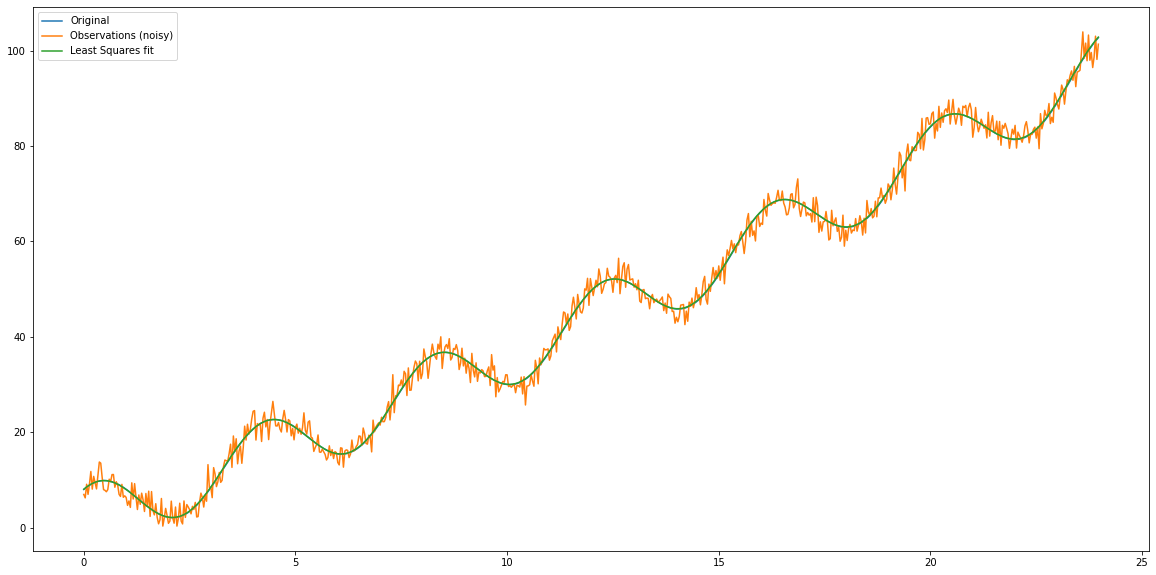

In [0]:
y_model = np.dot(X, beta)
e_model_1 = y_obs - y_model
plt.figure(figsize=(20,10))
plt.plot(t,y, label='Original')
plt.plot(t,y_obs, label='Observations (noisy)')
plt.plot(t, y_model, label='Least Squares fit')
plt.legend()

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.33333333e-02 1.11111111e-03]
 [1.00000000e+00 6.66666667e-02 4.44444444e-03]
 ...
 [1.00000000e+00 2.39000000e+01 5.71210000e+02]
 [1.00000000e+00 2.39333333e+01 5.72804444e+02]
 [1.00000000e+00 2.39666667e+01 5.74401111e+02]]
[2.7772579  2.89723861 0.04270648]


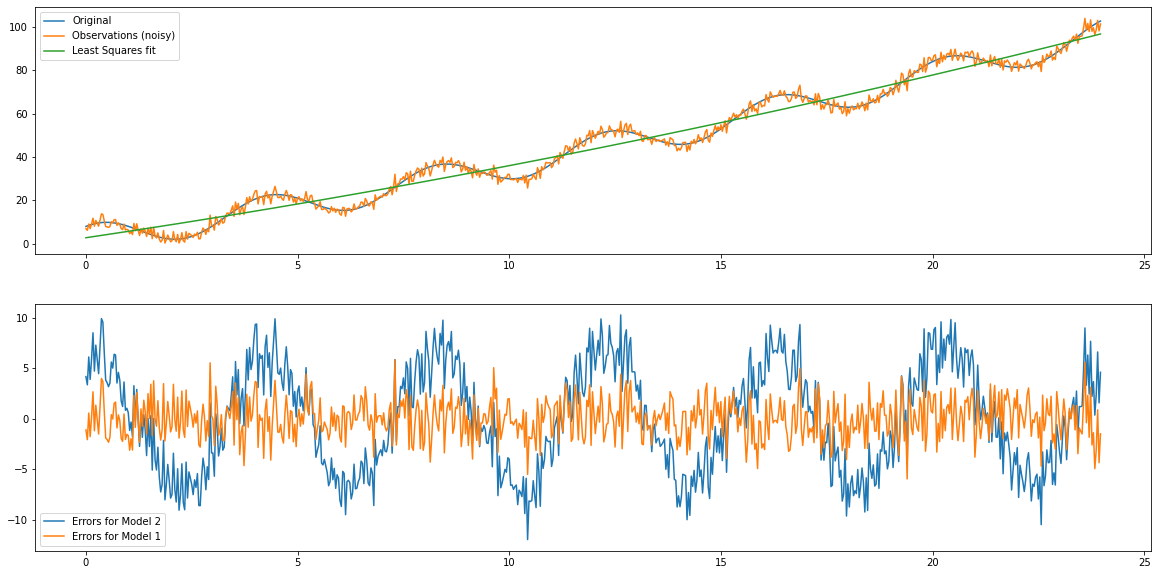

In [0]:
X = np.vstack( 
    (np.ones(len(t)),
     t,
     t**2
     )
).T


print (X)



A = np.dot(X.T, X)
b = np.dot(X.T, y_obs)

A_inv = np.linalg.inv(A)

beta = np.dot(A_inv, b)

print (beta)


y_model = np.dot(X, beta)

e_model2 = y_obs - y_model

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(t,y, label='Original')
plt.plot(t,y_obs, label='Observations (noisy)')
plt.plot(t, y_model, label='Least Squares fit')
plt.legend()
plt.subplot(212)
plt.plot(t,e_model2, label='Errors for Model 2')
plt.plot(t,e_model_1, label='Errors for Model 1')
plt.legend()
